In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/drive/MyDrive/data.csv")

In [5]:
# shows the first 5 rows of the dataframe
df.head(5)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     200389  https://sofifa.com/player/200389/jan-oblak/210002   
3     188545  https://sofifa.com/player/188545/robert-lewand...   
4     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  66+3  65+3   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        188         87    Slovenia      Atlético Madrid  ...  32+3  36+3   
3        184         80      Poland    FC Bayern München  ...  64+3  65+3   
4        175         68      Brazil  Paris Saint-Germain  ...  67+3  62+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  65+3  65+3  66+3  62+3  52+3  52+3  52+3  62+3  
1  61+3  61+3  65+3  61+3  54+3  54+3  54+3  61+3  
2  36+3  36+3  32+3  32+3  33+3  33+3  33+3  32+3  
3  65+3  65+3  64+3  61+3  60+3  60+3  60+3  61+3  
4  62+3  62+3  67+3  62+3  49+3  49+3  49+3  62+3  

[5 rows x 106 columns]

In [6]:
# shows the last 5 rows of the dataframe
df.tail(5)

sofifa_id                                         player_url  \
18939     256679  https://sofifa.com/player/256679/kevin-angulo/...   
18940     257710  https://sofifa.com/player/257710/mengxuan-zhan...   
18941     250989  https://sofifa.com/player/250989/zhenghao-wang...   
18942     257697  https://sofifa.com/player/257697/zitong-chen/2...   
18943     257936   https://sofifa.com/player/257936/yue-song/210002   

           short_name       long_name  age         dob  height_cm  weight_kg  \
18939       K. Angulo    Kevin Angulo   24  1996-04-13        176         73   
18940  Zhang Mengxuan  Mengxuan Zhang   21  1999-04-26        177         70   
18941   Wang Zhenghao             王政豪   20  2000-06-28        185         74   
18942     Chen Zitong     Zitong Chen   23  1997-02-20        186         80   
18943        Song Yue        Yue Song   28  1991-11-20        185         79   

      nationality                            club_name  ...   lwb   ldm   cdm  \
18939    Colombia                      América de Cali  ...  47+2  47+2  47+2   
18940    China PR  Chongqing Dangdai Lifan FC SWM Team  ...  42+2  41+2  41+2   
18941    China PR                      Tianjin TEDA FC  ...  42+2  42+2  42+2   
18942    China PR        Shijiazhuang Ever Bright F.C.  ...  47+2  49+2  49+2   
18943    China PR                      Tianjin TEDA FC  ...  47+0  47+0  47+0   

        rdm   rwb    lb   lcb    cb   rcb    rb  
18939  47+2  47+2  47+2  46+2  46+2  46+2  47+2  
18940  41+2  42+2  45+2  47+2  47+2  47+2  45+2  
18941  42+2  42+2  44+2  47+2  47+2  47+2  44+2  
18942  49+2  47+2  47+2  49+2  49+2  49+2  47+2  
18943  47+0  47+0  47+0  46+1  46+1  46+1  47+0  

[5 rows x 106 columns]

In [7]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 15.3+ MB


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 106, dtype: int64

In [11]:
def get_null_percentages(df, columns):
    result = {}
    for col in columns:
        if col in df.columns:
            null_count = df[col].isnull().sum()
            total_count = len(df)
            null_percentage = (null_count / total_count) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"

    return result

columns_to_check = ['club_name', 'league_name', 'league_rank', 'release_clause_eur', 'player_tags', 'team_position',
                    'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position',
                    'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
                    'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'defending_marking']
null_percentages = get_null_percentages(df, columns_to_check)

# Display the results properly
for column, percentage in null_percentages.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")

club_name: 1.19%
league_name: 1.19%
league_rank: 1.19%
release_clause_eur: 5.25%
player_tags: 92.57%
team_position: 1.19%
team_jersey_number: 1.19%
loaned_from: 96.0%
joined: 5.19%
contract_valid_until: 1.19%
nation_position: 94.05%
nation_jersey_number: 94.05%
pace: 11.0%
shooting: 11.0%
passing: 11.0%
dribbling: 11.0%
defending: 11.0%
physic: 11.0%
gk_diving: 89.0%
gk_handling: 89.0%
gk_kicking: 89.0%
gk_reflexes: 89.0%
gk_speed: 89.0%
gk_positioning: 89.0%
player_traits: 56.11%
defending_marking: 100.0%


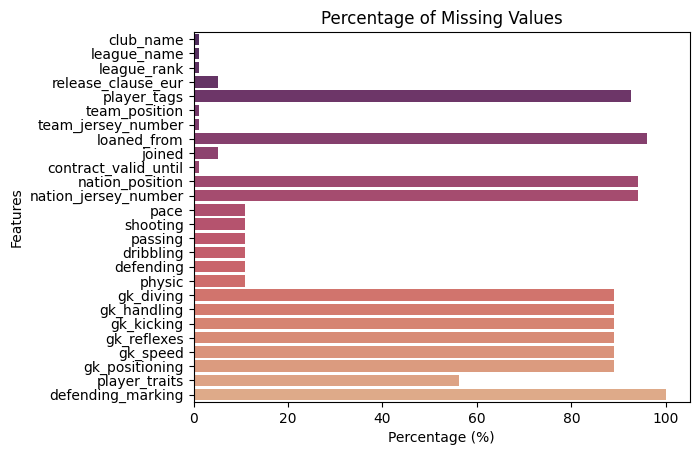

In [12]:
sns.barplot(data=null_percentages, x=null_percentages.values(), y=null_percentages.keys(), palette='flare_r', legend=False, hue=null_percentages.keys()).set(title="Percentage of Missing Values", xlabel="Percentage (%)", ylabel="Features")
plt.show()

In [13]:
# Calculate the median of the 'pace' column
median_value = df['pace'].median()

# Fill the missing values in the 'pace' column with the median value
df['pace'].fillna(median_value, inplace=True)

In [14]:
# Calculate the median of the 'shooting' column
median_value = df['shooting'].median()

# Fill the missing values in the 'shooting' column with the median value
df['shooting'].fillna(median_value, inplace=True)

In [15]:
# Calculate the median of the 'passing' column
median_value = df['passing'].median()

# Fill the missing values in the 'passing' column with the median value
df['passing'].fillna(median_value, inplace=True)

In [16]:
# Calculate the median of the 'dribbling' column
median_value = df['dribbling'].median()

# Fill the missing values in the 'dribbling' column with the median value
df['dribbling'].fillna(median_value, inplace=True)

In [17]:
# Calculate the median of the 'physic' column
median_value = df['physic'].median()

# Fill the missing values in the 'physic' column with the median value
df['physic'].fillna(median_value, inplace=True)

In [19]:
df[['pace', 'passing', 'shooting', 'dribbling', 'physic']].value_counts()

pace  passing  shooting  dribbling  physic
68.0  58.0     54.0      64.0       66.0      2083
82.0  66.0     70.0      77.0       75.0         2
87.0  54.0     58.0      72.0       52.0         2
54.0  46.0     61.0      55.0       54.0         2
75.0  63.0     64.0      69.0       61.0         2
                                              ... 
64.0  60.0     44.0      64.0       75.0         1
               45.0      62.0       70.0         1
                         64.0       53.0         1
               46.0      60.0       69.0         1
96.0  78.0     86.0      91.0       76.0         1
Name: count, Length: 16845, dtype: int64

In [21]:
null_percentages = get_null_percentages(df, columns_to_check)

# Display the results properly
for column, percentage in null_percentages.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")

club_name: 1.19%
league_name: 1.19%
league_rank: 1.19%
release_clause_eur: 5.25%
player_tags: 92.57%
team_position: 1.19%
team_jersey_number: 1.19%
loaned_from: 96.0%
joined: 5.19%
contract_valid_until: 1.19%
nation_position: 94.05%
nation_jersey_number: 94.05%
pace: 0.0%
shooting: 0.0%
passing: 0.0%
dribbling: 0.0%
defending: 11.0%
physic: 0.0%
gk_diving: 89.0%
gk_handling: 89.0%
gk_kicking: 89.0%
gk_reflexes: 89.0%
gk_speed: 89.0%
gk_positioning: 89.0%
player_traits: 56.11%
defending_marking: 100.0%


In [22]:
# Calculate the median of the 'defending' column
median_value = df['defending'].median()

# Fill the missing values in the 'defending' column with the median value
df['defending'].fillna(median_value, inplace=True)

In [23]:
null_percentages = get_null_percentages(df, columns_to_check)

# Display the results properly
for column, percentage in null_percentages.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")

club_name: 1.19%
league_name: 1.19%
league_rank: 1.19%
release_clause_eur: 5.25%
player_tags: 92.57%
team_position: 1.19%
team_jersey_number: 1.19%
loaned_from: 96.0%
joined: 5.19%
contract_valid_until: 1.19%
nation_position: 94.05%
nation_jersey_number: 94.05%
pace: 0.0%
shooting: 0.0%
passing: 0.0%
dribbling: 0.0%
defending: 0.0%
physic: 0.0%
gk_diving: 89.0%
gk_handling: 89.0%
gk_kicking: 89.0%
gk_reflexes: 89.0%
gk_speed: 89.0%
gk_positioning: 89.0%
player_traits: 56.11%
defending_marking: 100.0%


In [25]:
df.loc[:, ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']].fillna(0, inplace=True)

In [26]:
null_percentages = get_null_percentages(df, columns_to_check)

# Display the results properly
for column, percentage in null_percentages.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")

club_name: 1.19%
league_name: 1.19%
league_rank: 1.19%
release_clause_eur: 5.25%
player_tags: 92.57%
team_position: 1.19%
team_jersey_number: 1.19%
loaned_from: 96.0%
joined: 5.19%
contract_valid_until: 1.19%
nation_position: 94.05%
nation_jersey_number: 94.05%
pace: 0.0%
shooting: 0.0%
passing: 0.0%
dribbling: 0.0%
defending: 0.0%
physic: 0.0%
gk_diving: 89.0%
gk_handling: 89.0%
gk_kicking: 89.0%
gk_reflexes: 89.0%
gk_speed: 89.0%
gk_positioning: 89.0%
player_traits: 56.11%
defending_marking: 100.0%


In [30]:
df.drop(columns=['release_clause_eur','team_jersey_number','loaned_from','joined','nation_jersey_number','contract_valid_until','player_tags'], inplace=True)

In [31]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name',
       'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face',
       'team_position', 'nation_position', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning',
       'player_traits', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       

In [32]:
df.drop(columns=['sofifa_id', 'player_url', 'dob', 'real_face'], inplace=True)

In [33]:
df.columns

Index(['short_name', 'long_name', 'age', 'height_cm', 'weight_kg',
       'nationality', 'club_name', 'league_name', 'league_rank', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'team_position',
       'nation_position', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_streng

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 94 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18944 non-null  object 
 1   long_name                   18944 non-null  object 
 2   age                         18944 non-null  int64  
 3   height_cm                   18944 non-null  int64  
 4   weight_kg                   18944 non-null  int64  
 5   nationality                 18944 non-null  object 
 6   club_name                   18719 non-null  object 
 7   league_name                 18719 non-null  object 
 8   league_rank                 18719 non-null  float64
 9   overall                     18944 non-null  int64  
 10  potential                   18944 non-null  int64  
 11  value_eur                   18944 non-null  int64  
 12  wage_eur                    18944 non-null  int64  
 13  player_positions            189

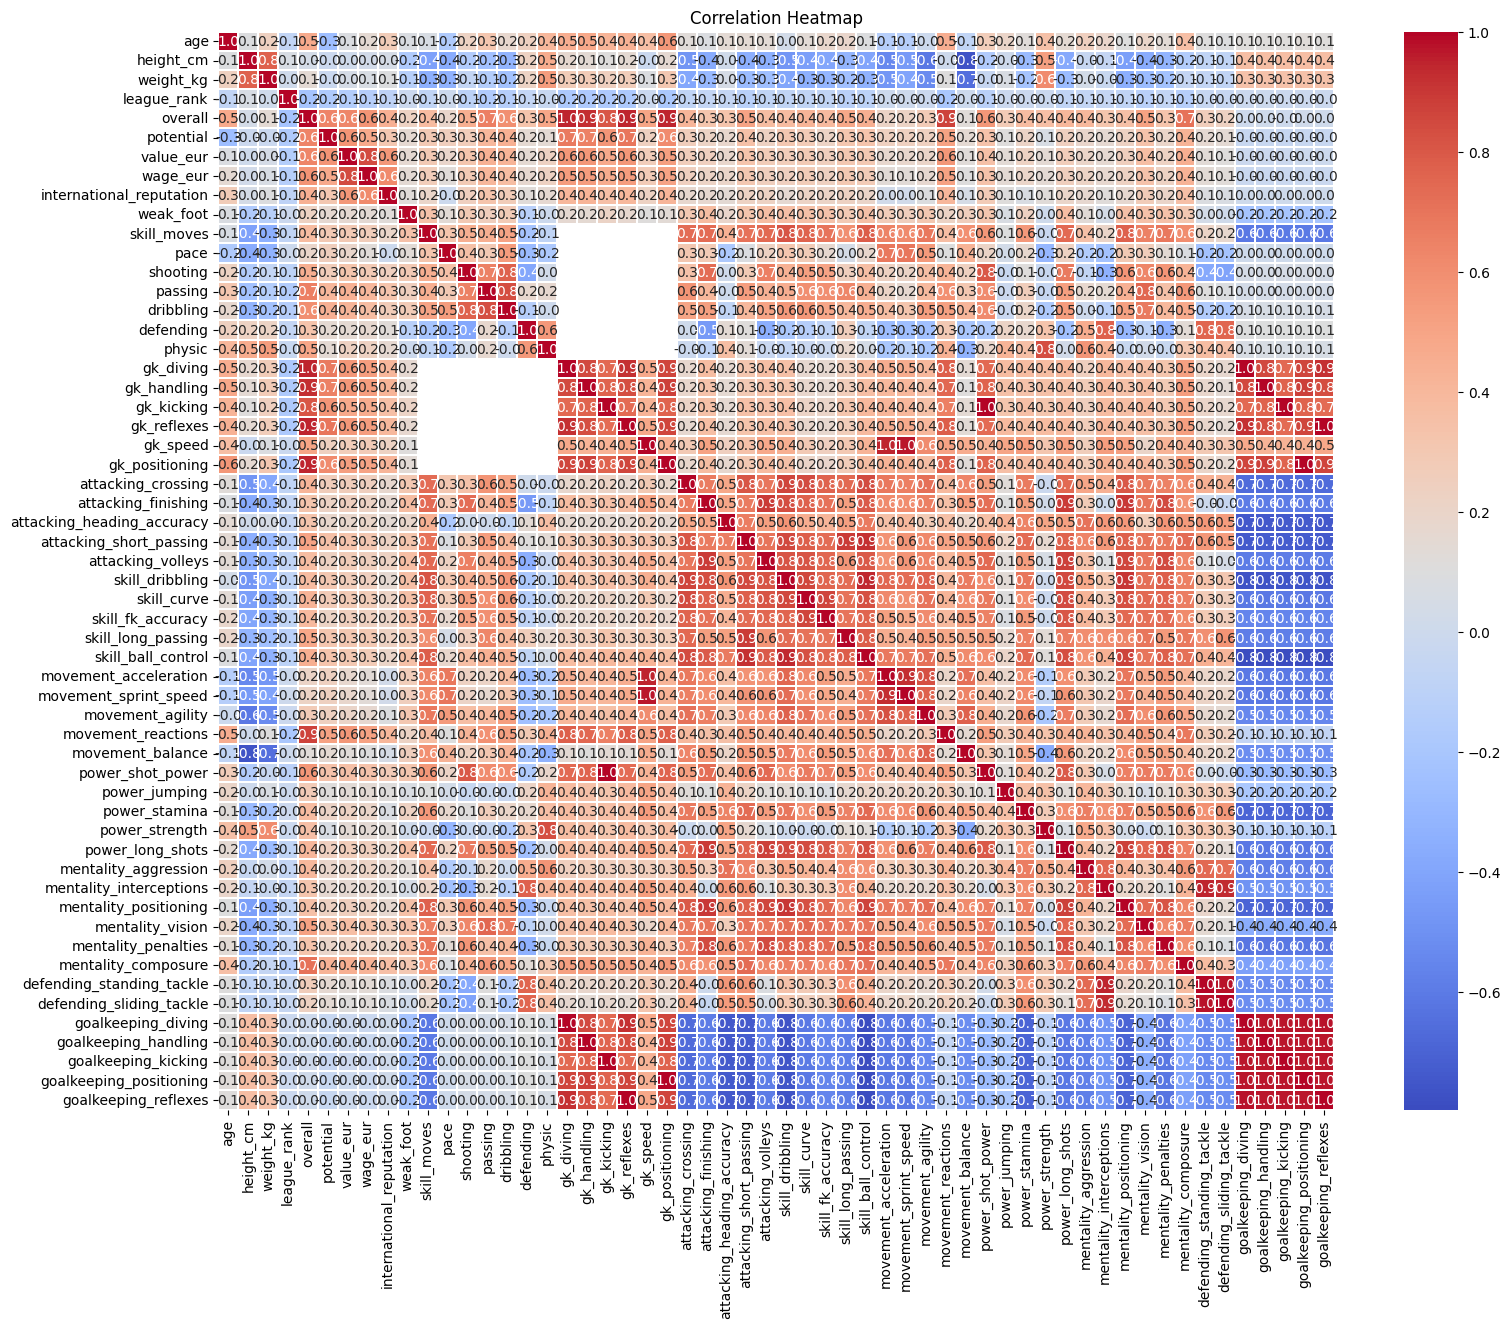

In [39]:
plt.figure(figsize=(18, 14))
sns.heatmap(df.corr(numeric_only=True), linewidth=0.1, annot=True, fmt='.1f', cmap='coolwarm').set(title='Correlation Heatmap')
plt.show()

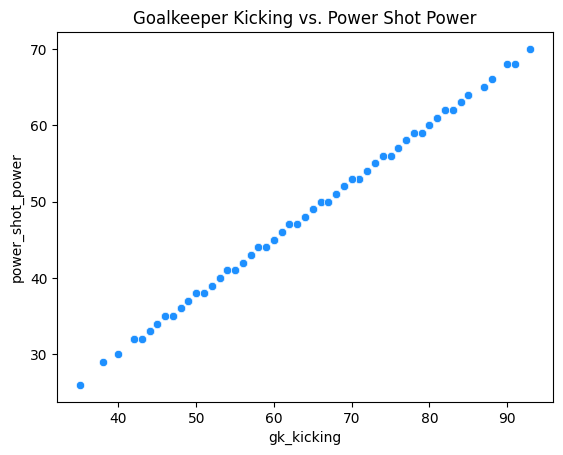

In [40]:
sns.scatterplot(data=df, x='gk_kicking', y='power_shot_power', color='dodgerblue').set(title='Goalkeeper Kicking vs. Power Shot Power')
plt.show()

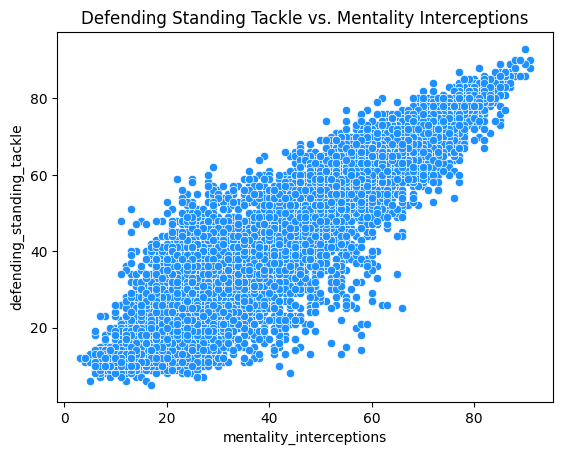

In [42]:
sns.scatterplot(data=df, y='defending_standing_tackle', x='mentality_interceptions', color='dodgerblue').set(title='Defending Standing Tackle vs. Mentality Interceptions')
plt.show()